In [2]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
import json
import numpy as np


Mounted at /content/drive


In [3]:
datatest = pd.read_csv('/content/drive/Shared drives/Genpact Competition 2020 Fall/train_test_split/test_set.csv',sep=',').drop("Unnamed: 0",axis=1)

#Gradient Boosting


In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [5]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

In [12]:
gb = GradientBoostingRegressor(n_estimators=300,max_depth=5,learning_rate=0.1)

'HOUR',
 'LAP_TIME',
 'ELAPSED',
 'LAP_NUMBER',
 'S1_LARGE',
 'S2_LARGE',
 'min_air_temp',
 'onehot_style_FP2',
 'S1',
 'max_humidity'

In [22]:
datatrainX=datatrainX[['HOUR', 'LAP_TIME', 'ELAPSED', 'LAP_NUMBER', 'S1_LARGE', 'S2_LARGE', 'min_air_temp', 'style_FP2', 'S1', 'max_humidity']]

In [23]:
datatestX=datatestX[['HOUR', 'LAP_TIME', 'ELAPSED', 'LAP_NUMBER', 'S1_LARGE', 'S2_LARGE', 'min_air_temp', 'style_FP2', 'S1', 'max_humidity']]

In [24]:
datavisualX1=datavisualX1[['HOUR', 'LAP_TIME', 'ELAPSED', 'LAP_NUMBER', 'S1_LARGE', 'S2_LARGE', 'min_air_temp', 'style_FP2', 'S1', 'max_humidity']]

In [25]:
datavisualX2=datavisualX2[['HOUR', 'LAP_TIME', 'ELAPSED', 'LAP_NUMBER', 'S1_LARGE', 'S2_LARGE', 'min_air_temp', 'style_FP2', 'S1', 'max_humidity']]

In [26]:
#Feature Selection
gb.fit(datatrainX, datatrain['max_lap']) 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
gb_predictions = gb.predict(datatestX) 
r2_score(datatest['max_lap'],gb_predictions)

0.9726882081946854

In [31]:
gb_predictions1 = gb.predict(datavisualX1) 
gb_predictions2 = gb.predict(datavisualX2) 

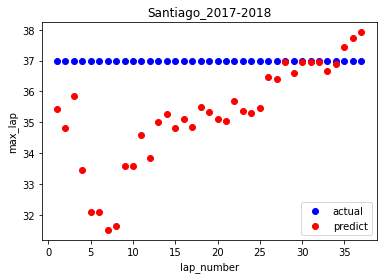

In [32]:
ax = plt.gca()
ax.scatter(datavisual1['LAP_NUMBER'], datavisual1['max_lap'],label='actual' ,color="b")
ax.scatter(datavisual1['LAP_NUMBER'], gb_predictions1, label='predict',color="r")
plt.legend(loc='lower right');
plt.title("Santiago_2017-2018")
plt.xlabel("lap_number")
plt.ylabel("max_lap")
plt.show()

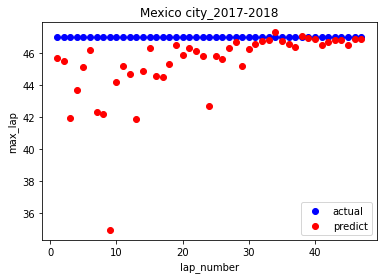

In [33]:
ax = plt.gca()
ax.scatter(datavisual2['LAP_NUMBER'], datavisual2['max_lap'],label='actual' ,color="b")
ax.scatter(datavisual2['LAP_NUMBER'], gb_predictions2, label='predict',color="r")
plt.legend(loc='lower right');
plt.title("Mexico city_2017-2018")
plt.xlabel("lap_number")
plt.ylabel("max_lap")
plt.show()

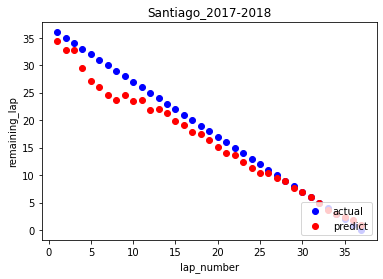

In [34]:
ax = plt.gca()
ax.scatter(datavisual1['LAP_NUMBER'], datavisual1['max_lap']-datavisual1['LAP_NUMBER'],label='actual' ,color="b")
ax.scatter(datavisual1['LAP_NUMBER'], gb_predictions1-datavisual1['LAP_NUMBER'], label='predict',color="r")
plt.legend(loc='lower right');
plt.title("Santiago_2017-2018")
plt.xlabel("lap_number")
plt.ylabel("remaining_lap")
plt.show()

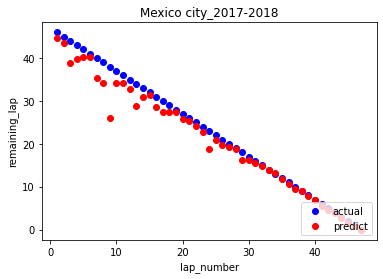

In [35]:
ax = plt.gca()
ax.scatter(datavisual2['LAP_NUMBER'], datavisual2['max_lap']-datavisual2['LAP_NUMBER'],label='actual' ,color="b")
ax.scatter(datavisual2['LAP_NUMBER'], gb_predictions2-datavisual2['LAP_NUMBER'], label='predict',color="r")
plt.legend(loc='lower right');
plt.title("Mexico city_2017-2018")
plt.xlabel("lap_number")
plt.ylabel("remaining_lap")
plt.show()

#XGBoost

In [36]:
xg_reg = xgb.XGBRegressor(verbosity=0,n_estimators=150,max_depth=7,learning_rate=0.1)

[('verbosity', 0), ('n_estimators', 150), ('max_depth', 7), ('learning_rate', 0.1)]

'HOUR',
 'LAP_TIME',
 'Mean_place',
 'ELAPSED',
 'LAP_NUMBER',
 'S1',
 'S1_LARGE',
 'onehot_style_FP2',
 'std_air_temp',
 'onehot_style_Q'

In [55]:
datatrainX['Mean_place']=datatrainX[['place_Berlin', 'place_Berlin2', 'place_Buenos', 'place_Hong Kong',
       'place_Hong Kong2', 'place_HongKong', 'place_Marrakesh', 'place_Mexico',
       'place_Mexico city', 'place_Monaco', 'place_Montreal', 'place_Newyork',
       'place_Newyork2', 'place_Paris', 'place_Punta', 'place_Santiago',
       'place_Zurich', 'place_newyork2']].mean(axis=1)

In [56]:
datatestX['Mean_place']=datatestX[['place_Berlin', 'place_Berlin2', 'place_Buenos', 'place_Hong Kong',
       'place_Hong Kong2', 'place_HongKong', 'place_Marrakesh', 'place_Mexico',
       'place_Mexico city', 'place_Monaco', 'place_Montreal', 'place_Newyork',
       'place_Newyork2', 'place_Paris', 'place_Punta', 'place_Santiago',
       'place_Zurich', 'place_newyork2']].mean(axis=1)

In [59]:
len(['place_Berlin', 'place_Berlin2', 'place_Buenos', 'place_Hong Kong',
       'place_Hong Kong2', 'place_HongKong', 'place_Marrakesh', 'place_Mexico',
       'place_Mexico city', 'place_Monaco', 'place_Montreal', 'place_Newyork',
       'place_Newyork2', 'place_Paris', 'place_Punta', 'place_Santiago',
       'place_Zurich', 'place_newyork2'])

18

In [61]:
datavisualX1['Mean_place']=1/18
datavisualX2['Mean_place']=1/18

In [62]:
datatrainX=datatrainX[['HOUR', 'LAP_TIME', 'Mean_place', 'ELAPSED', 'LAP_NUMBER', 'S1', 'S1_LARGE', 'style_FP2', 'std_air_temp', 'style_Q']]
datatestX=datatestX[['HOUR', 'LAP_TIME', 'Mean_place', 'ELAPSED', 'LAP_NUMBER', 'S1', 'S1_LARGE', 'style_FP2', 'std_air_temp', 'style_Q']]
datavisualX1=datavisualX1[['HOUR', 'LAP_TIME', 'Mean_place', 'ELAPSED', 'LAP_NUMBER', 'S1', 'S1_LARGE', 'style_FP2', 'std_air_temp', 'style_Q']]
datavisualX2=datavisualX2[['HOUR', 'LAP_TIME', 'Mean_place', 'ELAPSED', 'LAP_NUMBER', 'S1', 'S1_LARGE', 'style_FP2', 'std_air_temp', 'style_Q']]

In [64]:
#Feature Selection
xg_reg.fit(datatrainX, datatrain['max_lap']) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [65]:
xgb_predictions = xg_reg.predict(datatestX) 
r2_score(datatest['max_lap'],xgb_predictions)

0.972908405134352

In [67]:
xgb_predictions1 = xg_reg.predict(datavisualX1) 
xgb_predictions2 = xg_reg.predict(datavisualX2) 

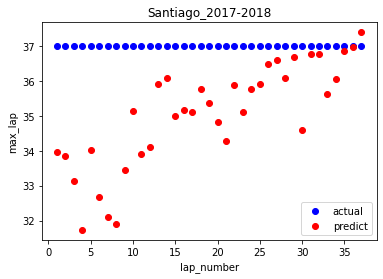

In [68]:
ax = plt.gca()
ax.scatter(datavisual1['LAP_NUMBER'], datavisual1['max_lap'],label='actual' ,color="b")
ax.scatter(datavisual1['LAP_NUMBER'], xgb_predictions1, label='predict',color="r")
plt.legend(loc='lower right');
plt.title("Santiago_2017-2018")
plt.xlabel("lap_number")
plt.ylabel("max_lap")
plt.show()

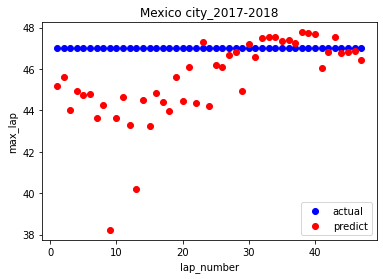

In [69]:
ax = plt.gca()
ax.scatter(datavisual2['LAP_NUMBER'], datavisual2['max_lap'],label='actual' ,color="b")
ax.scatter(datavisual2['LAP_NUMBER'], xgb_predictions2, label='predict',color="r")
plt.legend(loc='lower right');
plt.title("Mexico city_2017-2018")
plt.xlabel("lap_number")
plt.ylabel("max_lap")
plt.show()

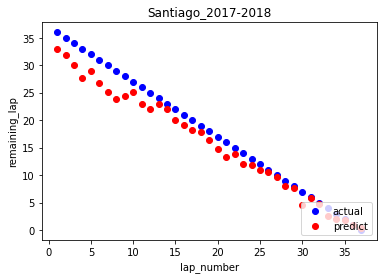

In [70]:
ax = plt.gca()
ax.scatter(datavisual1['LAP_NUMBER'], datavisual1['max_lap']-datavisual1['LAP_NUMBER'],label='actual' ,color="b")
ax.scatter(datavisual1['LAP_NUMBER'], xgb_predictions1-datavisual1['LAP_NUMBER'], label='predict',color="r")
plt.legend(loc='lower right');
plt.title("Santiago_2017-2018")
plt.xlabel("lap_number")
plt.ylabel("remaining_lap")
plt.show()

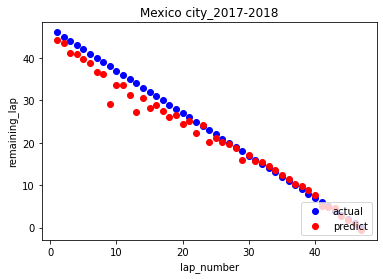

In [71]:
ax = plt.gca()
ax.scatter(datavisual2['LAP_NUMBER'], datavisual2['max_lap']-datavisual2['LAP_NUMBER'],label='actual' ,color="b")
ax.scatter(datavisual2['LAP_NUMBER'], xgb_predictions2-datavisual2['LAP_NUMBER'], label='predict',color="r")
plt.legend(loc='lower right');
plt.title("Mexico city_2017-2018")
plt.xlabel("lap_number")
plt.ylabel("remaining_lap")
plt.show()

#SVR

 C=100, gamma=0.0001, kernel=rbf

In [39]:
datatestX=datatest.drop(['Number', 'DRIVER_NUMBER','keys', 'max_lap', 'target', 'match_key'],axis=1)

In [40]:
datatestX=pd.get_dummies(datatestX,columns=['time','place'])

In [41]:
datatrain = pd.read_csv('/content/drive/Shared drives/Genpact Competition 2020 Fall/train_test_split/test_set.csv',sep=',').drop("Unnamed: 0",axis=1)
datatrainX=datatrain.drop(['Number', 'DRIVER_NUMBER','keys', 'max_lap', 'target', 'match_key'],axis=1)
datatrainX=pd.get_dummies(datatrainX,columns=['time','place'])

In [42]:
datavisual = pd.read_csv('/content/drive/Shared drives/Genpact Competition 2020 Fall/train_test_split/sample_race.csv',sep=',').drop("Unnamed: 0",axis=1)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR

In [ ]:
clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svr', SVR(gamma=0.0001,kernel='rbf',C=100))])

In [ ]:
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

In [ ]:
for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, datatestX, datatest['max_lap'])
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())



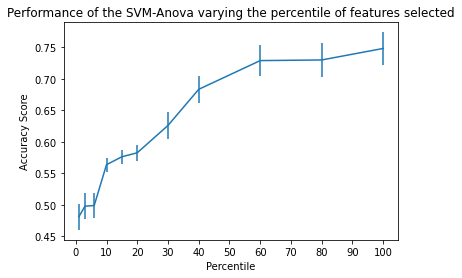

In [ ]:
plt.errorbar(percentiles, score_means[11:], np.array(score_stds[11:]))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()

In [28]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report,r2_score, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
svr =SVR(gamma=0.0001,kernel='rbf',C=100)

In [ ]:
svr.fit(datatrainX, datatrain['max_lap']) 

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_predictions = svr.predict(datatestX) 
r2_score(datatest['max_lap'],svr_predictions)

0.9405472768394819

In [43]:
datavisual1=datavisual[datavisual['Number']==25]
datavisual2=datavisual[datavisual['Number']==66]

In [44]:
datavisualX1=datavisual1.drop(['Number', 'DRIVER_NUMBER','keys', 'max_lap', 'target', 'match_key'],axis=1)
datavisualX1=pd.get_dummies(datavisualX1,columns=['time','place'])

In [45]:
datavisualX2=datavisual2.drop(['Number', 'DRIVER_NUMBER','keys', 'max_lap', 'target', 'match_key'],axis=1)
datavisualX2=pd.get_dummies(datavisualX2,columns=['time','place'])

In [16]:
set1 = set(datatestX.columns)    
set2 = set(datavisualX1.columns)    
for i in list(set1^set2):
  datavisualX1[i]=0

In [17]:
set1 = set(datatestX.columns)    
set2 = set(datavisualX2.columns)    
for i in list(set1^set2):
  datavisualX2[i]=0

In [ ]:
svr_predictions1 = svr.predict(datavisualX1) 
svr_predictions2 = svr.predict(datavisualX2) 

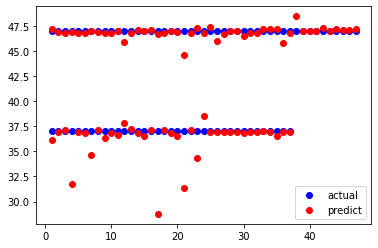

In [ ]:
ax = plt.gca()
ax.scatter(datavisual['LAP_NUMBER'], datavisual['max_lap'],label='actual' ,color="b")
ax.scatter(datavisual['LAP_NUMBER'], svr_predictions, label='predict',color="r")
plt.legend(loc='lower right');
plt.show()

In [ ]:
ax = plt.gca()
ax.scatter(datavisual1['LAP_NUMBER'], datavisual1['max_lap'],label='actual' ,color="b")
ax.scatter(datavisual1['LAP_NUMBER'], svr_predictions1, label='predict',color="r")
plt.legend(loc='lower right');
plt.show()

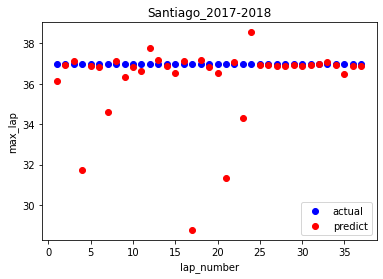

In [ ]:
ax = plt.gca()
ax.scatter(datavisual1['LAP_NUMBER'], datavisual1['max_lap'],label='actual' ,color="b")
ax.scatter(datavisual1['LAP_NUMBER'], svr_predictions1, label='predict',color="r")
plt.legend(loc='lower right');
plt.title("Santiago_2017-2018")
plt.xlabel("lap_number")
plt.ylabel("max_lap")
plt.show()

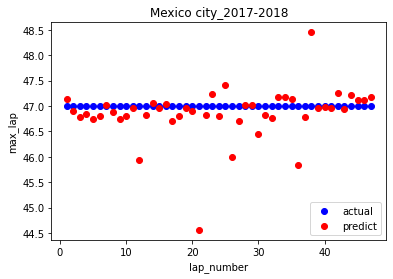

In [ ]:
ax = plt.gca()
ax.scatter(datavisual2['LAP_NUMBER'], datavisual2['max_lap'],label='actual' ,color="b")
ax.scatter(datavisual2['LAP_NUMBER'], svr_predictions2, label='predict',color="r")
plt.legend(loc='lower right');
plt.title("Mexico city_2017-2018")
plt.xlabel("lap_number")
plt.ylabel("max_lap")
plt.show()

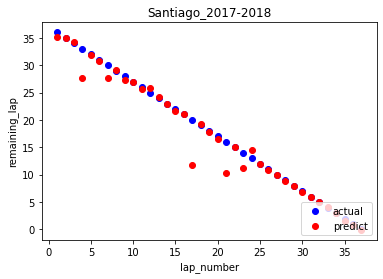

In [ ]:
ax = plt.gca()
ax.scatter(datavisual1['LAP_NUMBER'], datavisual1['max_lap']-datavisual1['LAP_NUMBER'],label='actual' ,color="b")
ax.scatter(datavisual1['LAP_NUMBER'], svr_predictions1-datavisual1['LAP_NUMBER'], label='predict',color="r")
plt.legend(loc='lower right');
plt.title("Santiago_2017-2018")
plt.xlabel("lap_number")
plt.ylabel("remaining_lap")
plt.show()

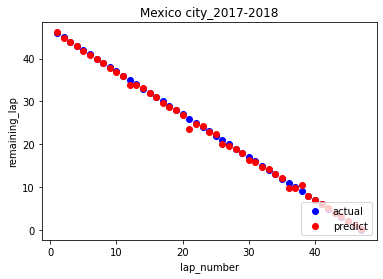

In [ ]:
ax = plt.gca()
ax.scatter(datavisual2['LAP_NUMBER'], datavisual2['max_lap']-datavisual2['LAP_NUMBER'],label='actual' ,color="b")
ax.scatter(datavisual2['LAP_NUMBER'], svr_predictions2-datavisual2['LAP_NUMBER'], label='predict',color="r")
plt.legend(loc='lower right');
plt.title("Mexico city_2017-2018")
plt.xlabel("lap_number")
plt.ylabel("remaining_lap")
plt.show()